# Chapter 4 Training Models

## Linear Regression (Normal Equation)

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)
X.shape

(100, 1)

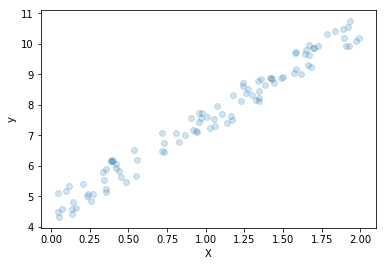

In [3]:
import matplotlib.pyplot as plt
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
%matplotlib inline
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X, y, alpha=0.2)

In [4]:
theta_best

array([[ 4.48212747],
       [ 3.04234196]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.48212747],
       [ 10.56681139]])

In [6]:
X_new_b

array([[ 1.,  0.],
       [ 1.,  2.]])

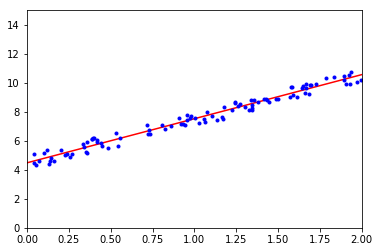

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

The equivalent code using Scikit-Learn:

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.48212747]), array([[ 3.04234196]]))

In [9]:
lin_reg.predict(X_new) # the same as Normal Equation

array([[  4.48212747],
       [ 10.56681139]])

## Batch Gradient Descent

In [10]:
def gradient(x, y, m, theta):
    return (2/m) * x.T.dot(x.dot(theta) - y)

eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[ 4.48212747],
       [ 3.04234196]])

In [11]:
X_b.shape

(100, 2)

In [12]:
A = [1, 2, 3]
A[0: 2]

[1, 2]

## Stochastic Gradient Descent

In [13]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = gradient(xi, yi, 1, theta)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
theta

array([[ 4.46925993],
       [ 3.05496556]])

In [14]:
y.ravel().shape
X.shape

(100, 1)

In [15]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.49185403]), array([ 3.0486674]))

## Polynomial Regression

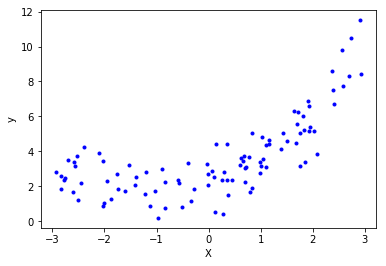

In [16]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([ 2.70217748])

In [18]:
X_poly[0] # X[0] and X[0]^2 due to the degree=2

array([ 2.70217748,  7.30176311])

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.20887256]), array([[ 1.0172445 ,  0.47965406]]))

In [20]:
X_test = np.array([[4, -2], [1, 1], [2.25, 1.5],[1.21, 1.1], [1.44, 1.2]])
y_predict = lin_reg.predict(X_test)
#y_predict = X_test.dot(lin_reg.coef_.T) + lin_reg.intercept_
X_test[:1]

array([[ 4., -2.]])

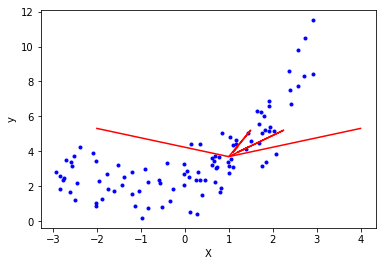

In [21]:
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y, "b.")
plt.plot(X_test, y_predict, "r-")
plt.show()

## Learning Curves

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)): # This step is cruial! adjust the data size from 1 to m. But for val, all of them are computed
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.axis([0, 80, 0, 3])
        

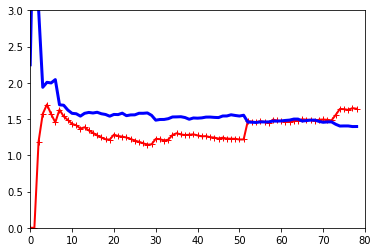

In [23]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

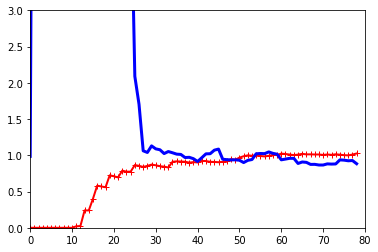

In [24]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression()),
 ))
plot_learning_curves(polynomial_regression, X, y)

## Regularized Linear Models

### Ridge Regression

In [25]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[0]])

array([[ 3.54731804]])

In [26]:
sgd_reg = SGDRegressor(max_iter=999, penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[0]])

array([ 3.54693413])

### Lasso Regression

In [27]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[0]])

array([ 3.55056163])

### Elastic Net

In [28]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[0]])

array([ 3.55034201])

### Early Stopping

860

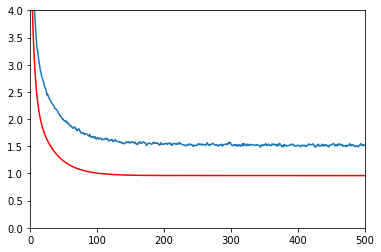

In [29]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                      learning_rate="constant", eta0=0.0005)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y.ravel(), test_size=0.2)

X_train_poly_scaled = X_train
X_val_poly_scaled = X_val
epochall = []
val_error_all = []
train_error_all = []
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    epochall.append(epoch)
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_error = mean_squared_error(y_train_predict, y_train)
    train_error_all.append(train_error)
    val_error = mean_squared_error(y_val_predict, y_val)
    val_error_all.append(val_error)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

plt.axis([0, 500, 0, 4])
plt.plot(epochall, val_error_all, label="val")
plt.plot(epochall, train_error_all, "r-", label="train")
best_epoch

## Logistic Regression 

In [30]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [31]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [32]:
X = iris["data"][:, 3:] # [:, :] the number of rows and columns. petal width
# the same as X = iris["data"][:, 3:]; X.reshape(-1, 1)
y1 = (iris["target"] == 2)
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Viginica, else 0
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

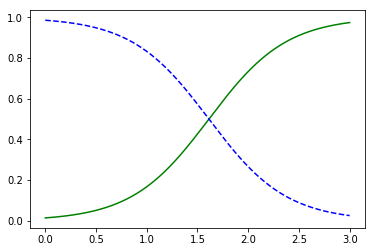

In [33]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Viginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Viginica")

In [35]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [41]:
X = iris["data"][:, 2: 4] # petal length, petal width
y = iris["target"]
X,y

(array([[ 1.4,  0.2],
        [ 1.4,  0.2],
        [ 1.3,  0.2],
        [ 1.5,  0.2],
        [ 1.4,  0.2],
        [ 1.7,  0.4],
        [ 1.4,  0.3],
        [ 1.5,  0.2],
        [ 1.4,  0.2],
        [ 1.5,  0.1],
        [ 1.5,  0.2],
        [ 1.6,  0.2],
        [ 1.4,  0.1],
        [ 1.1,  0.1],
        [ 1.2,  0.2],
        [ 1.5,  0.4],
        [ 1.3,  0.4],
        [ 1.4,  0.3],
        [ 1.7,  0.3],
        [ 1.5,  0.3],
        [ 1.7,  0.2],
        [ 1.5,  0.4],
        [ 1. ,  0.2],
        [ 1.7,  0.5],
        [ 1.9,  0.2],
        [ 1.6,  0.2],
        [ 1.6,  0.4],
        [ 1.5,  0.2],
        [ 1.4,  0.2],
        [ 1.6,  0.2],
        [ 1.6,  0.2],
        [ 1.5,  0.4],
        [ 1.5,  0.1],
        [ 1.4,  0.2],
        [ 1.5,  0.1],
        [ 1.2,  0.2],
        [ 1.3,  0.2],
        [ 1.5,  0.1],
        [ 1.3,  0.2],
        [ 1.5,  0.2],
        [ 1.3,  0.3],
        [ 1.3,  0.3],
        [ 1.3,  0.2],
        [ 1.6,  0.6],
        [ 1.9,  0.4],
        [ 

In [42]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
softmax_reg.predict([[5, 2]])

array([2])

In [44]:
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])